In [48]:
from datetime import datetime
import numpy as np             
import pandas as pd            
import matplotlib.pylab as plt 
%matplotlib inline  
import seaborn as sns
from xgboost import plot_importance, plot_tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [49]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [50]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True)

In [51]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [52]:
'''data = data.set_index(['Month'])
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(data)'''

"data = data.set_index(['Month'])\nplt.xlabel('Date')\nplt.ylabel('Number of air passengers')\nplt.plot(data)"

In [53]:
train_data = data[:len(data)-12]
print(train_data)
test_data = data[len(data)-12:]
print(test_data.shape)
test_data

         Month  #Passengers
0   1949-01-01          112
1   1949-02-01          118
2   1949-03-01          132
3   1949-04-01          129
4   1949-05-01          121
..         ...          ...
127 1959-08-01          559
128 1959-09-01          463
129 1959-10-01          407
130 1959-11-01          362
131 1959-12-01          405

[132 rows x 2 columns]
(12, 2)


,Month,#Passengers
132,1960-01-01,417
133,1960-02-01,391
134,1960-03-01,419
135,1960-04-01,461
136,1960-05-01,472
137,1960-06-01,535
138,1960-07-01,622
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461


In [54]:
train = train_data[:len(train_data)-12]
print(train)
valid = train_data[len(train_data)-12:]
print(valid.shape)
valid

         Month  #Passengers
0   1949-01-01          112
1   1949-02-01          118
2   1949-03-01          132
3   1949-04-01          129
4   1949-05-01          121
..         ...          ...
115 1958-08-01          505
116 1958-09-01          404
117 1958-10-01          359
118 1958-11-01          310
119 1958-12-01          337

[120 rows x 2 columns]
(12, 2)


,Month,#Passengers
120,1959-01-01,360
121,1959-02-01,342
122,1959-03-01,406
123,1959-04-01,396
124,1959-05-01,420
125,1959-06-01,472
126,1959-07-01,548
127,1959-08-01,559
128,1959-09-01,463
129,1959-10-01,407


In [55]:
train['Year'] = train['Month'].dt.year
train['Monthly'] = train['Month'].dt.month
train.head()

C:\Users\abulf\AppData\Local\Temp\ipykernel_12124\1732517643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Year'] = train['Month'].dt.year
C:\Users\abulf\AppData\Local\Temp\ipykernel_12124\1732517643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Monthly'] = train['Month'].dt.month


,Month,#Passengers,Year,Monthly
0,1949-01-01,112,1949,1
1,1949-02-01,118,1949,2
2,1949-03-01,132,1949,3
3,1949-04-01,129,1949,4
4,1949-05-01,121,1949,5


In [56]:
valid['Year'] = valid['Month'].dt.year
valid['Monthly'] = valid['Month'].dt.month
valid.head()

C:\Users\abulf\AppData\Local\Temp\ipykernel_12124\128774447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Year'] = valid['Month'].dt.year
C:\Users\abulf\AppData\Local\Temp\ipykernel_12124\128774447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Monthly'] = valid['Month'].dt.month


,Month,#Passengers,Year,Monthly
120,1959-01-01,360,1959,1
121,1959-02-01,342,1959,2
122,1959-03-01,406,1959,3
123,1959-04-01,396,1959,4
124,1959-05-01,420,1959,5


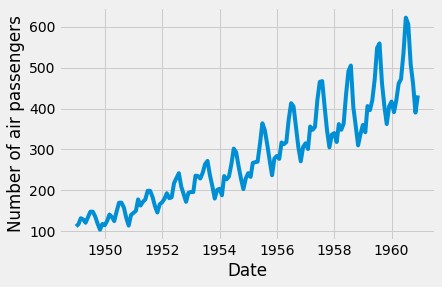

In [57]:
data = data.set_index(['Month'])
train = train.set_index(['Month'])
valid = valid.set_index(['Month'])
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(data)

In [58]:
train

,#Passengers,Year,Monthly
Month,,,
1949-01-01,112,1949,1
1949-02-01,118,1949,2
1949-03-01,132,1949,3
1949-04-01,129,1949,4
1949-05-01,121,1949,5
...,...,...,...
1958-08-01,505,1958,8
1958-09-01,404,1958,9
1958-10-01,359,1958,10


In [59]:
X_train = train[['Year','Monthly']]
y_train = train['#Passengers']
X_valid = valid[['Year','Monthly']]
y_vali = valid['#Passengers']

In [60]:
X_train

,Year,Monthly
Month,,
1949-01-01,1949,1
1949-02-01,1949,2
1949-03-01,1949,3
1949-04-01,1949,4
1949-05-01,1949,5
...,...,...
1958-08-01,1958,8
1958-09-01,1958,9
1958-10-01,1958,10


In [61]:
y_train

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
Name: #Passengers, Length: 120, dtype: int64

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import plot_importance, plot_tree

In [63]:
reg = xgb.XGBRegressor(n_estimators=1000)

In [64]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

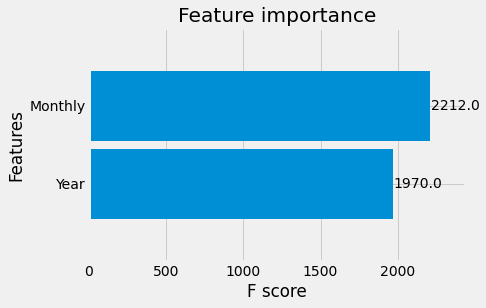

In [65]:
_ = plot_importance(reg, height=0.9)

In [66]:
test_data['Year'] = test_data['Month'].dt.year
test_data['Monthly'] = test_data['Month'].dt.month
#test_data = test_data.set_index(['Month'])
test_data

,Month,#Passengers,Year,Monthly
132,1960-01-01,417,1960,1
133,1960-02-01,391,1960,2
134,1960-03-01,419,1960,3
135,1960-04-01,461,1960,4
136,1960-05-01,472,1960,5
137,1960-06-01,535,1960,6
138,1960-07-01,622,1960,7
139,1960-08-01,606,1960,8
140,1960-09-01,508,1960,9
141,1960-10-01,461,1960,10


In [67]:
X_test = test_data[['Year','Monthly']]
y_test = test_data['#Passengers']
data_test = reg.predict(X_test)
data_test

array([339.98257, 317.96686, 362.0515 , 347.9624 , 362.92072, 435.02744,
       491.03992, 505.15356, 403.99628, 358.94366, 310.0514 , 336.97192],
      dtype=float32)

In [68]:
df_forecast = pd.DataFrame({'#Passengers':data_test})
df_forecast

,#Passengers
0,339.982574
1,317.966858
2,362.051514
3,347.962402
4,362.920715
5,435.027435
6,491.039917
7,505.153564
8,403.996277
9,358.943665


In [69]:
y = test_data['#Passengers']
Y = df_forecast['#Passengers']
y_true, Y_pred = np.array(y), np.array(Y)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100
print(mape)

19.98834508028341


In [70]:
test_data = test_data.rename(index = lambda x: x - 132)
test_data

,Month,#Passengers,Year,Monthly
0,1960-01-01,417,1960,1
1,1960-02-01,391,1960,2
2,1960-03-01,419,1960,3
3,1960-04-01,461,1960,4
4,1960-05-01,472,1960,5
5,1960-06-01,535,1960,6
6,1960-07-01,622,1960,7
7,1960-08-01,606,1960,8
8,1960-09-01,508,1960,9
9,1960-10-01,461,1960,10


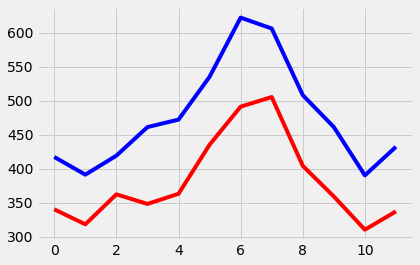

In [71]:
orig = plt.plot(test_data['#Passengers'], color='blue', label='Original')
predicted = plt.plot(df_forecast['#Passengers'], color='red', label='Predicted')
plt.show()